In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [9]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [10]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [11]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [12]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [13]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [15]:
# Find the most recent date in the data set.
mr_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(mr_date)

('2017-08-23',)


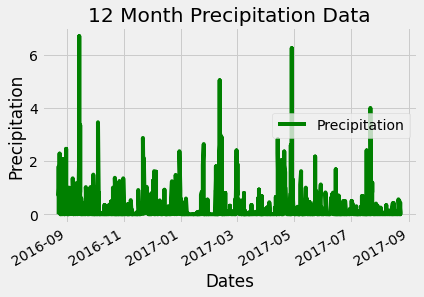

In [25]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
oy_date = dt.date(2017,8,23) - dt.timedelta(days=365)
# Perform a query to retrieve the data and precipitation scores
data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= oy_date).order_by(Measurement.date).all()
# Save the query results as a Pandas DataFrame and set the index to the date column
data_df = pd.DataFrame(data, columns=["Date", "Precipitation"])
data_df["Date"] = pd.to_datetime(data_df["Date"])

# Sort the dataframe by date
data_df = data_df.sort_values("Date").dropna().set_index("Date")
# Use Pandas Plotting with Matplotlib to plot the data
data_df.plot(color="green")
plt.xlabel("Dates")
plt.ylabel("Precipitation")
plt.title("12 Month Precipitation Data")
plt.show()

In [19]:
# Use Pandas to calculate the summary statistics for the precipitation data
data_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [27]:
# Design a query to calculate the total number stations in the dataset
tot_stations = session.query(Station).count()
print(tot_stations)

9


In [30]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
most_active_stations = session.query(Measurement.station, func.count(Measurement.date)).group_by(Measurement.station).\
order_by(func.count(Measurement.date).desc()).all()
print(most_active_stations)

[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


In [39]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
ma_station=session.query(Measurement.station).group_by(Measurement.station).\
order_by(func.count(Measurement.date).desc()).first()
most_active_station = ma_station[0]
print(most_active_station)
session.query(Measurement.station, func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station==most_active_station).all()

USC00519281


[('USC00519281', 54.0, 85.0, 71.66378066378067)]

Text(0, 0.5, 'Frequency')

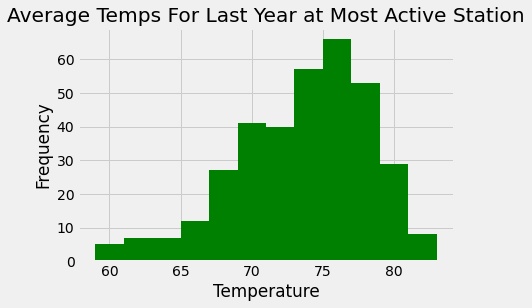

In [48]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tdata=session.query(Measurement.tobs).filter(Measurement.station==most_active_station).\
filter(Measurement.date>=oy_date).all()
tdata_df = pd.DataFrame(tdata, columns=["tobs"])

plt.hist(tdata_df["tobs"], bins=12, color="green")
plt.title("Average Temps For Last Year at Most Active Station")
plt.xlabel("Temperature")
plt.ylabel("Frequency")

# Close session

In [49]:
# Close Session
session.close()